1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

[[5.73333333 5.22824669 4.81905994 ... 0.9806761  1.30905477 1.73333333]
 [5.53934431 5.03507391 4.6267034  ... 0.86586267 1.19505759 1.62015239]
 [5.36089797 4.85744382 4.44988955 ... 0.76659193 1.09660309 1.52251414]
 ...
 [1.52251414 1.09660309 0.76659193 ... 4.44988955 4.85744382 5.36089797]
 [1.62015239 1.19505759 0.86586267 ... 4.6267034  5.03507391 5.53934431]
 [1.73333333 1.30905477 0.9806761  ... 4.81905994 5.22824669 5.73333333]]


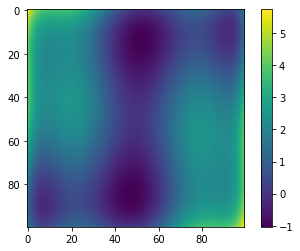

In [2]:
#notes
#numpy.meshgrid(*xi, copy=True, sparse=False, indexing='xy'
#https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

#matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None,
#interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

#https://www.geeksforgeeks.org/numpy-meshgrid-function/


import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

x = np.linspace(-2, 2, num = 100)
y = np.linspace(-1, 1, num = 100)

# The meshgrid function returns
# two 2-dimensional arrays
x_1, y_1 = np.meshgrid(x, y)


def f(x,y):
    return (4-2.1*x*x+(1/3)*(x**4))*(x**2)+x*y+ (4*y*y-4)*y*y

f_grid = f(x_1, y_1)
print(f_grid)
graph1 = plt.imshow(f_grid)
#extent =[x_1.min(), x_1.max(), y_1.min(), y_1.max()]
plt.colorbar(graph1)

#fun = lambda x_1, y_1: (4-2.1*x_1*x_1+(1/3)*(x_1**4))*(x_1**2)+x_1*y_1+ (4*y_1*y_1-4)*y_1*y_1
#res = minimize(fun, x_1, y_1)




2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.